<a href="https://www.kaggle.com/aminizahra/edge-of-leaf?scriptVersionId=88418561" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Imports**

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

**Part 1: Edge detection**

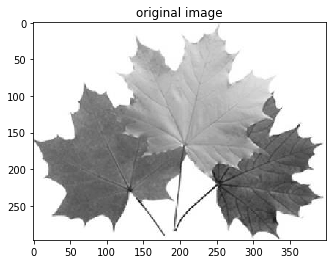

In [2]:
# 1, 2:
path_img='../input/leaf-edge/leaf.jpg'
img = cv.imread(path_img, 0)
plt.imshow(img, interpolation='nearest', cmap=plt.cm.gray),plt.title("original image")
plt.show()

In [3]:
# 3:
Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
Ky = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
print("Kx:")
print(Kx, '\n')
print("Ky:")
print(Ky, '\n')

Kx:
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] 

Ky:
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]] 



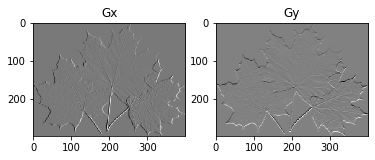

In [4]:
# 4:
Gx = np.zeros(img.shape)
Gy = np.zeros(img.shape)
for i in range(img.shape[0]-2):
  for j in range(img.shape[1]-2):
    Gx[i+1, j+1] = np.sum(np.multiply(img[i:i+3, j:j+3], Kx))
    Gy[i+1, j+1] = np.sum(np.multiply(img[i:i+3, j:j+3], Ky))
plt.subplot(121),plt.imshow(Gx, interpolation='nearest', cmap=plt.cm.gray), plt.title("Gx")
plt.subplot(122),plt.imshow(Gy, interpolation='nearest', cmap=plt.cm.gray), plt.title("Gy")
plt.show()

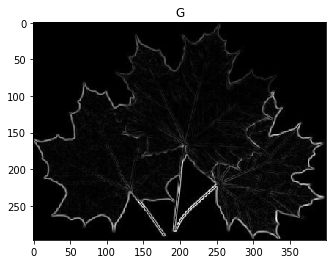

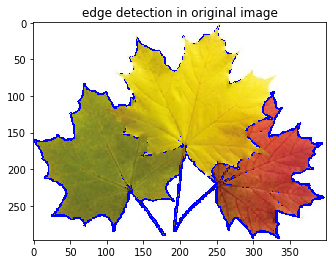

In [5]:
# 5:
#|G|=square root(Gx**2+Gy**2)
G = np.sqrt(Gx**2 + Gy**2)
plt.imshow(G, interpolation='nearest', cmap=plt.cm.gray), plt.title("G")
plt.show()

th = 150
new_img = cv.imread(path_img)
new_img = cv.cvtColor(new_img, cv.COLOR_BGR2RGB)
for i in range(G.shape[0]):
  for j in range(G.shape[1]):
    if(G[i, j]>th):
      new_img[i, j] = (0, 0, 255)
plt.imshow(new_img, interpolation='nearest', cmap=plt.cm.gray), plt.title("edge detection in original image")
plt.show()

**Part 2 : Hough Transform**

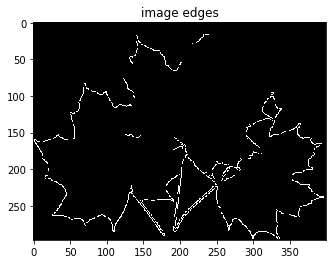

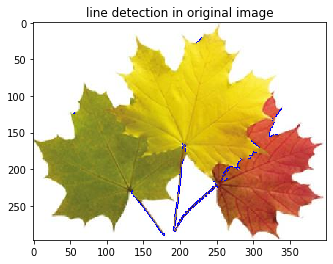

In [6]:
img = cv.imread(path_img, 0)
edges = cv.Canny(img,max(img.shape[0], img.shape[1]),150,apertureSize = 3)

plt.imshow(edges, interpolation='nearest', cmap=plt.cm.gray), plt.title("image edges")
plt.show()

new_img = cv.imread(path_img)
new_img = cv.cvtColor(new_img, cv.COLOR_BGR2RGB)

# solution 1:
# minLineLength = 100
# maxLineGap = 3
# lines = cv.HoughLinesP(edges,1,np.pi/180,50,minLineLength,maxLineGap)
# for i in range(len(lines)):
#   for x1,y1,x2,y2 in lines[i]:
#     cv.line(new_img,(x1,y1),(x2,y2),(0,0,255),2)

# solution 2:
w = np.zeros(edges.shape)
lines = cv.HoughLines(edges,1,np.pi/180,50)
for i in range(14):
  for rho,theta in lines[i]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(w,(x1,y1),(x2,y2),255,2)
new_img[w*edges>0] = (0,0,255)

plt.imshow(new_img, interpolation='nearest', cmap=plt.cm.gray), plt.title("line detection in original image")
plt.show()